#Capacity Spectrum Method (CSM)

The capacity spectrum method (CSM) represents a nonlinear static procedure capable of estimate the nonlinear response of structures, utilizing overdamped response spectra. These response spectra can be extracted from a building code, or derived based on a ground motion records. In this fragility method, the CSM is employed to test building portfolios against a set of ground motion records.

 In the following figure, a fragility model developed using this method is presented: 
<img src="../../../../../figures/fragility_example.png" height="200" width="400" align="middle">

##Load capacity curves

In order to use this methodology, it is necessary to provide one (or a group) of capacity curves, defined according to the format established on the [RMTK manual](../../../../../rmtk-docs.pdf). Please provide the location of the folder containing this input using the parameter input_folder.

In [2]:
from rmtk.vulnerability.common import utils
%matplotlib inline 

capacity_curves_file = '../../../../../../rmtk_data/all_curves.csv'
capacity_curves = utils.read_capacity_curves(capacity_curves_file)
utils.plot_capacity_curves(capacity_curves)

AttributeError: 'list' object has no attribute 'split'

## Load ground motion records

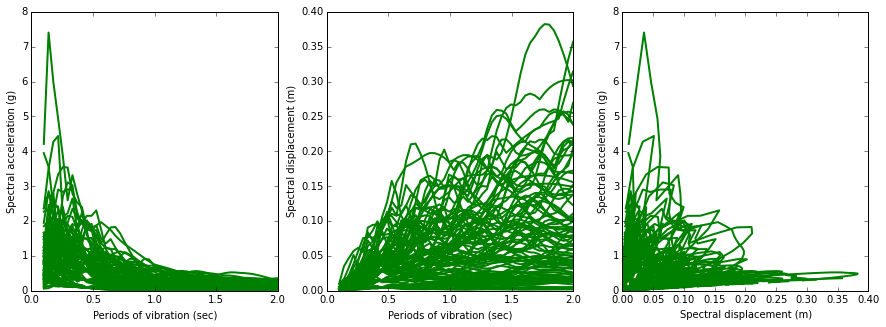

In [2]:
gmrs_folder = '/Users/vitorsilva/Documents/GEM/git/gem/rmtk_data/accelerograms'
gmrs = utils.read_gmrs(gmrs_folder)
minT = 0.1
maxT = 2
utils.plot_response_spectra(gmrs,minT,maxT)

##Calculate fragility function


5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%
100%


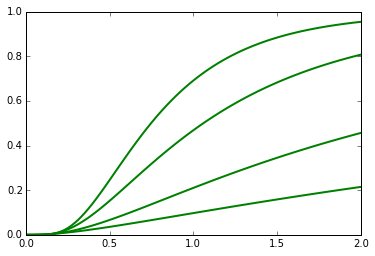

In [3]:
import capacitySpectrumMethod

damage_model = utils.read_damage_model('/Users/vitorsilva/Documents/GEM/git/gem/rmtk_data/damage_model.csv')
damping_model = 'Priesley_et_al2007'
damping = 0.05
T = 0.3
PDM, Sds = capacitySpectrumMethod.calculate_fragility(capacity_curves,gmrs,damage_model,damping_model)
fragility_model = utils.calculate_mean_fragility(gmrs,PDM,T,damping,'Sa',damage_model)
print fragility_model
utils.plot_fragility_model(fragility_model,0.01,2)